<a href="https://colab.research.google.com/github/WillianVeras/avaliacaon1/blob/master/Regressao_Linear_Trab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# 1 - Carregar os dados
import pandas as pd
df = pd.read_csv("/content/sample_data/pokemon.csv", encoding = "UTF-8")

In [120]:
# 2 - Visualizar a Tabela de Dados
df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
# 3 - Classificar quais são as Variáveis Categóricas e quais são as Variávies Quantitativas

# Variavel Qualitativa (Name,Type 1,Type 2,Generation,Legendary)
# Variavel Quantitativa (HP,Attack,Defense,Sp. Atk,Sp. Def,Speed)

In [110]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [91]:
rng = df.head(10)
rng

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [181]:
df.isna().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [122]:
#Média dos pontos de vinda
mhp = df['HP']
mhp.mean()

69.25875

In [125]:
#Maior Ataque
maxat = df['Attack']
maxat.max()

190

In [126]:
#Maior Defesa
maxdf = df['Defense']
maxdf.max()

230

In [136]:
#Agrupamento Simples - Média de Ataque por Tipo
agrs = df[["Type 1","Attack"]].groupby(["Type 1"]).mean()
agrs

,Attack
Type 1,
Bug,70.971014
Dark,88.387097
Dragon,112.125000
Electric,69.090909
Fairy,61.529412
Fighting,96.777778
Fire,84.769231
Flying,78.750000
Ghost,73.781250


In [137]:
#Agrupamento - Média de Ataque por Tipos
agrp = df[["Type 1","Type 2","Attack"]].groupby(["Type 1","Type 2"]).mean()
agrp

Attack
Type 1 Type 2              
Bug    Electric   62.000000
       Fighting  155.000000
       Fire       72.500000
       Flying     70.142857
       Ghost      90.000000
...                     ...
Water  Ice        83.333333
       Poison     68.333333
       Psychic    73.000000
       Rock       82.750000
       Steel      86.000000

[136 rows x 1 columns]

In [175]:
coluna = df["HP"]
total = (coluna >= 10)
total

0      True
1      True
2      True
3      True
4      True
       ... 
795    True
796    True
797    True
798    True
799    True
Name: HP, Length: 800, dtype: bool

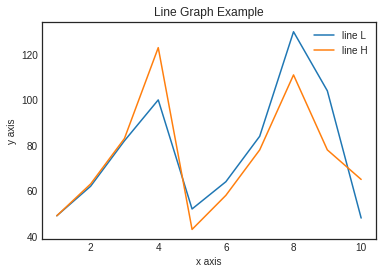

In [92]:
import matplotlib.pyplot as plt
import numpy as np
 
x  = rng['#']
y1 = rng['Attack']
y2 = rng['Defense']
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

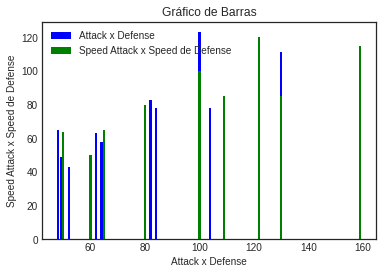

In [98]:
x1 = rng['Attack']
y1 = rng['Defense']
x2 = rng['Sp. Atk']
y2 = rng['Sp. Def']

plt.bar(x1,y1, label = 'Attack x Defense', color='b')
plt.bar(x2,y2, label = 'Speed Attack x Speed de Defense', color='g')

plt.xlabel("Attack x Defense")
plt.ylabel("Speed Attack x Speed de Defense")
plt.title("Gráfico de Barras")
plt.legend()
plt.show()

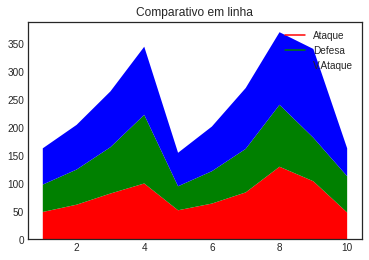

In [104]:
index = rng['#']
atk = rng['Attack']
defs = rng['Defense']
spa = rng['Sp. Atk'] 

plt.plot([], [], color='r', label = 'Ataque')
plt.plot([], [], color='g', label = 'Defesa')
plt.plot([], [], color='b', label = 'V.Ataque')

plt.stackplot(index, atk, defs, spa, colors = ['r','g','b'])
plt.title('Comparativo em linha')
plt.legend()
plt.show()

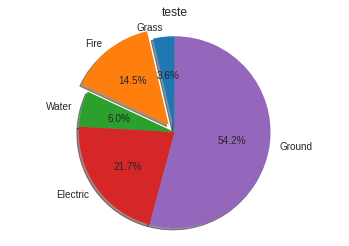

In [79]:
labels = 'Grass', 'Fire', 'Water','Bug','Normal','Poison','Electric','Ground','Fairy','Fighting','Psychic','Rock','Ghost','Ice','Dragon','Dark','Steel','Flying'
sections = df['Type 1']
#colors = ['r','g','y','b','p']

height = [3, 12, 5, 18, 45] #Falta Pegar os Valores Agrupados
bars = ('Grass','Fire','Water','Electric', 'Ground')
explode = (0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(height, explode=explode, labels=bars, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
plt.title('teste')
plt.show()



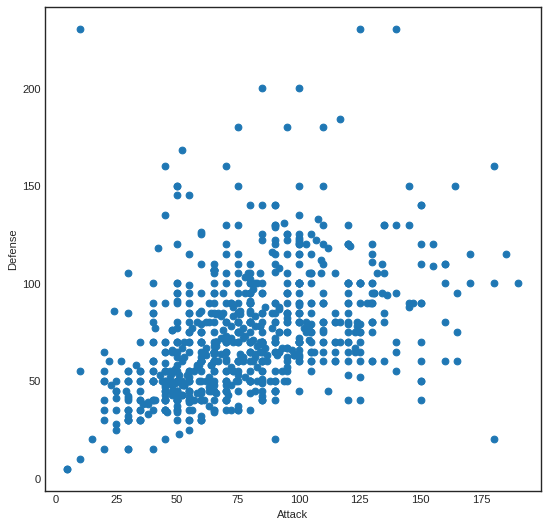

In [184]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x = df['Attack'], y = df['Defense'])
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show() 

In [185]:
X, Y = df['Attack'].values, df['Defense'].values

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [186]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [193]:
X_Train

array([[110],
       [ 85],
       [ 50],
       [100],
       [ 40],
       [ 65],
       [ 51],
       [130],
       [164],
       [134],
       [ 80],
       [ 50],
       [ 75],
       [ 91],
       [100],
       [ 81],
       [ 60],
       [ 24],
       [150],
       [ 93],
       [ 80],
       [ 90],
       [ 73],
       [ 65],
       [130],
       [ 45],
       [ 80],
       [ 71],
       [ 84],
       [120],
       [120],
       [ 48],
       [ 50],
       [ 63],
       [ 60],
       [ 65],
       [ 70],
       [ 85],
       [ 30],
       [ 80],
       [ 30],
       [ 40],
       [ 70],
       [ 65],
       [ 40],
       [ 65],
       [103],
       [ 55],
       [ 95],
       [110],
       [ 95],
       [ 80],
       [ 50],
       [160],
       [ 90],
       [ 50],
       [ 66],
       [ 30],
       [ 63],
       [105],
       [125],
       [ 70],
       [ 25],
       [ 60],
       [ 75],
       [ 20],
       [ 49],
       [ 45],
       [ 84],
       [ 30],
       [135],
      

In [194]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
import numpy as np
X = np.array([32])
X = X.reshape(-1, 1)
Y_Pred = linear.predict(X)
#Y = linear.predict(X)
Y_Pred

array([[53.89164015]])

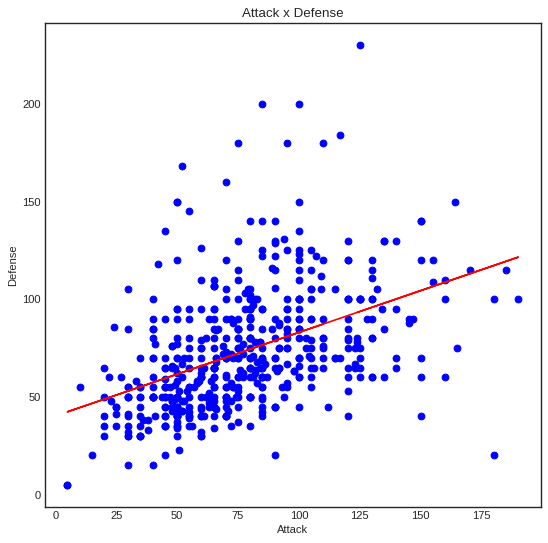

In [196]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X_Train, Y_Train, color = 'blue')
plt.plot(X_Train, linear.predict(X_Train), color = 'red')
plt.title('Attack x Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()